# 5. 송도국제도시 입지 분석: 지금까지의 여정 정리

---

## 1️⃣ 출발점: 왜 입지 분석이 필요한가?

- 단순히 “얼마에 거래될 것인가?”만을 예측하는 것이 아니라,  
  **어디가 좋은 입지인가**, **왜 특정 지역은 예외적으로 가격이 다른가**를 해석하고자 합니다.
- 특히 **택지개발지구인 송도**는 구조적으로 균일해 보이지만,  
  실제로는 **GTX, 센트럴파크, 브랜드, 역세권 여부 등 입지 편차가 심하게 존재**합니다.

> 📌 따라서 **가격 예측보다 한 걸음 더 나아간 “입지 가치 분석”이 필요하다고 판단됩니다.**

---

## 2️⃣ 공간 분석의 핵심 도구들

### ✅ 클러스터링 (KMeans)
- 공구 단위(zone)를 넘어서, **위경도 기반 미세 입지 분류** 시도
- 특히 공구 1에서는 내부 이질성을 설명하기 위해 클러스터링이 큰 효과를 발휘

### ✅ 시각화 (Folium, Scatter, Boxplot)
- 클러스터별 평균 가격을 시각화하여 **고가/저가 입지** 식별
- 지리적 패턴을 **지도에 직접 표시하여 공간적 인사이트 확보**

### ✅ 거리 기반 변수 도입
- 지하철역까지의 거리, 공원까지의 거리 등 **위치 변수의 정량화**
- 예측 모델에 실질적인 설명력을 더해주는 주요 요소

---

## 3️⃣ 클러스터별 특성 해석 (공구 1 내부 분석)

| 클러스터 | 특성 요약 | 가격 수준 | 해석 요점 |
|----------|-----------|-----------|-----------|
| 0 | 중심부, 신축, 대형 평형 | 고가 | 역세권 + 브랜드 영향 |
| 1 | 외곽, 구축 위주 | 저가 | 개발 이전 기반시설 부족 |
| 2 | 혼합 입지 | 중간 | 다층적 입지 조건 혼재 |
| 3 | 이질적 분포 | 불안정 | 예측 성능 저하 → 보정 필요 |

---

## 4️⃣ 정책 변수와 입지 해석의 통합

| 공구 | 입지적 특성 | 정책 변수 | 분석 전략 |
|------|--------------|-------------|--------------|
| 공구 1 | 내부 이질성 | 없음 | 클러스터링 + 전용모델 |
| 공구 6 | 대규모 개발 기대감 | 랜드마크시티, MICE 등 | 정책 변수 도입 필요 |
| 공구 8 | 문화공간 확충, 복합시설 | 공공 유원지 전환 등 | 행정 변화 모니터링 필요 |

> 📌 입지 분석은 단순히 “현재 위치”를 보는 것이 아니라,  
> **“개발 가능성, 행정 이슈, 미래 프리미엄”까지 아우르는 시야**가 필요하다는 걸 확인하였습니다.

---

## 5️⃣ 지금까지 얻은 핵심 통찰

- **입지는 숫자가 아닌 이야기다**: 거리, 브랜드, 면적을 넘어 입지에는 “맥락”이 존재합니다.
- **예외 구역은 별도로 다루어야 한다**: 클러스터 3, 공구 6·8은 단순 회귀 모델로는 해석이 어렵습니다.
- **정책 변수와 공간 변수는 함께 가야 한다**: 입지 분석은 행정 + 공간의 결합적 해석입니다.

# **---------------------------------------------------**

# 전반적인 입지 추천 점수 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 항해사 테마 컬러 팔레트
navipalette = {
    "deep_navy": "#0A2342",
    "ocean_blue": "#1B6CA8",
    "sand_beige": "#D9CBA3",
    "sunset_orange": "#FF8552",  # 강조용
    "star_yellow": "#FFCB05",
    "sail_white": "#FFFCF5"
}

def apply_navistyle():
    """
    항해사 테마 스타일을 matplotlib + seaborn에 적용합니다.
    (폰트: 맑은 고딕, 색상 위주 스타일)
    """
    sns.set_style("whitegrid")
    mpl.rcParams.update({
        'axes.facecolor': navipalette["sail_white"],
        'figure.facecolor': navipalette["sail_white"],
        'axes.edgecolor': navipalette["deep_navy"],
        'axes.labelcolor': navipalette["deep_navy"],
        'xtick.color': navipalette["deep_navy"],
        'ytick.color': navipalette["deep_navy"],
        'text.color': navipalette["deep_navy"],
        'axes.titleweight': 'bold',
        'axes.titlesize': 16,
        'axes.labelsize': 12,
        'grid.color': "#e0e0e0",
        'font.family': 'Malgun Gothic',
        'axes.unicode_minus': False
    })

# 🔹 전용 wrapper 함수 1: lineplot
def navilineplot(x, y, title="", xlabel="", ylabel="", label=None, highlight=False):
    apply_navistyle()
    color = navipalette["sunset_orange"] if highlight else navipalette["ocean_blue"]
    
    plt.plot(x, y, color=color, linewidth=2.5, label=label)
    if label:
        plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# 🔹 전용 wrapper 함수 2: barplot
def navibarplot(x, y, title="", xlabel="", ylabel="", label=None, highlight=False):
    apply_navistyle()
    color = navipalette["sunset_orange"] if highlight else navipalette["ocean_blue"]

    plt.bar(x, y, color=color, label=label)
    if label:
        plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# 🔹 전용 wrapper 함수 3: scatterplot
def naviscatterplot(x, y, title="", xlabel="", ylabel="", label=None, highlight=False):
    apply_navistyle()
    color = navipalette["sunset_orange"] if highlight else navipalette["ocean_blue"]

    plt.scatter(x, y, color=color, s=80, label=label)
    if label:
        plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('rename_final_df_with_prediction.csv')

In [ ]:
location_cols = [
    'excluUseAr', 'floor', 'longitude', 'dist_to_nearest_station_m',
    'dist_to_nearest_facility_m', 'nearby_conveniences', 'nearby_transports',
    'zone_1', 'zone_2', 'zone_5', 'zone_6', 'zone_8', 'zone_9',
    'brand_더샵', 'brand_자이', 'brand_푸르지오', 'brand_힐스테이트',
    'Market Interest Rate', 'HousingSupplyRate(%)'
]

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[location_cols].astype(float)
y = df['log_dealAmount'].astype(float)

model = LinearRegression()
model.fit(X, y)

# 회귀 계수 저장
coef = pd.Series(model.coef_, index=location_cols)


In [ ]:
# 점수 = 회귀계수 × 단지별 피처값
df['loc_score'] = X.dot(coef)

# 스케일 정규화 (0~100)
df['loc_score_scaled'] = (df['loc_score'] - df['loc_score'].min()) / (df['loc_score'].max() - df['loc_score'].min()) * 100


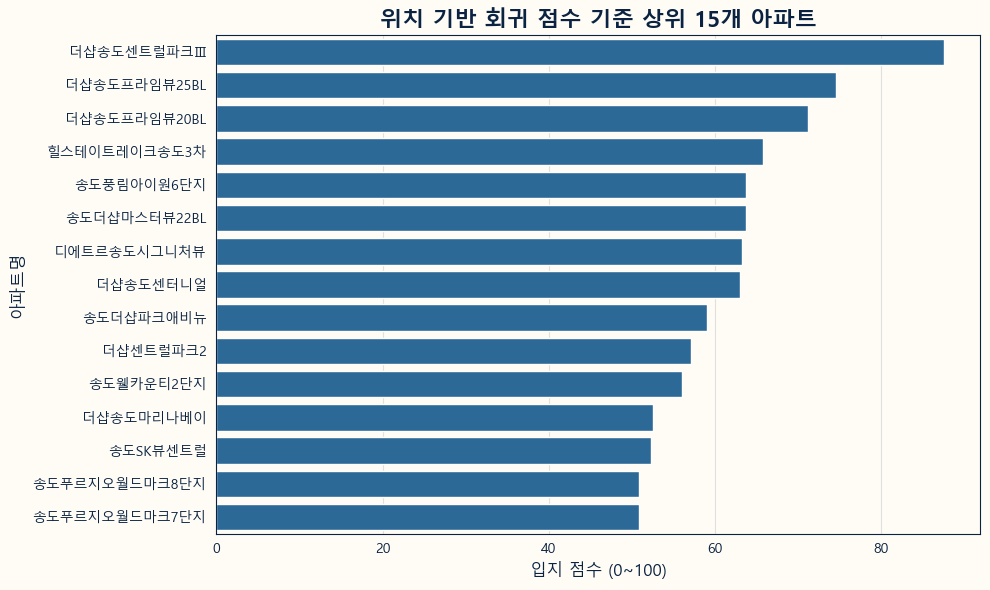

In [ ]:
# 상위 15개 아파트 추출
top_loc_score = df.drop_duplicates("aptNm").sort_values("loc_score_scaled", ascending=False).head(15)

# 시각화
apply_navistyle()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_loc_score, x="loc_score_scaled", y="aptNm", color=navipalette["ocean_blue"])
plt.title("위치 기반 회귀 점수 기준 상위 15개 아파트")
plt.xlabel("입지 점수 (0~100)")
plt.ylabel("아파트명")
plt.tight_layout()
plt.show()


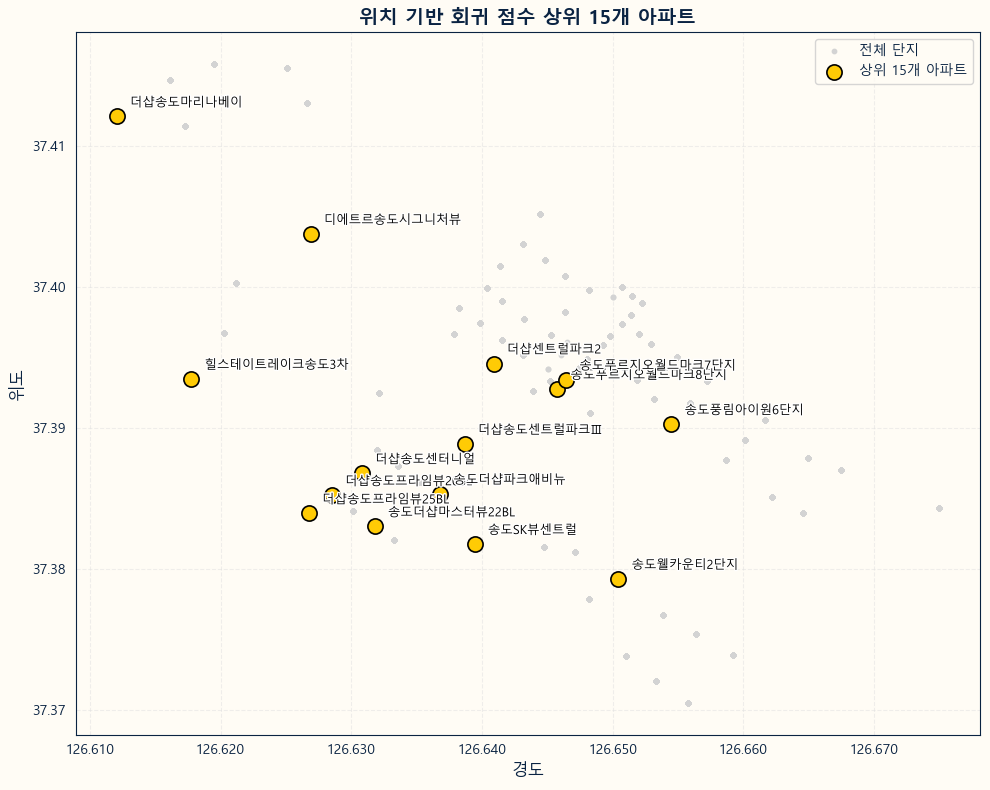

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.ticker as ticker

# 지도 시각화를 위한 위도, 경도 확인
lat_col = "latitude" if "latitude" in df.columns else "위도"
lon_col = "longitude" if "longitude" in df.columns else "경도"

# 정적 시각화 (축 표기 개선 포함)
plt.figure(figsize=(10, 8))
plt.scatter(df[lon_col], df[lat_col], s=10, color='lightgray', label='전체 단지')
plt.scatter(top_loc_score[lon_col], top_loc_score[lat_col],
            s=120, color=navipalette["star_yellow"], edgecolor='black', linewidth=1.2, label='상위 15개 아파트')

# 텍스트 레이블 추가 (가독성 개선)
for _, row in top_loc_score.iterrows():
    txt = plt.text(
        row[lon_col] + 0.001, row[lat_col] + 0.0005,
        row['aptNm'],
        fontsize=9,
        ha='left',
        va='bottom',
        color='black',
        path_effects=[
            path_effects.Stroke(linewidth=2, foreground='white'),
            path_effects.Normal()
        ]
    )

# 과학적 표기 제거
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

plt.title("위치 기반 회귀 점수 상위 15개 아파트", fontsize=14, weight='bold')
plt.xlabel("경도", fontsize=12)
plt.ylabel("위도", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()


# **---------------------------------------------------**

# 페르소나에 따른 입지 추천 알고리즘 점수

## 🧍🏻‍♀️페르소나: 송도의 평균적인 거주자 – **김도연(37세)**

| 항목 | 내용 |
|------|------|
| 👤 이름 | 김도연 (가명) |
| 🎂 나이 | 37세 |
| 👨‍👩‍👧 가족구성 | 남편(38세, 연구직), 자녀 1명(5세, 유치원) |
| 🏢 직업 | 외국계 제약회사 마케팅 매니저 (송도에 위치한 글로벌 캠퍼스 근무) |
| 💰 소득 | 연소득 가구합산 약 1.2억 원 수준 |
| 🏠 주거 | 송도 더샵 센트럴시티 84㎡ 거주, 전세(7억 원대) |
| 🎓 교육 | 자녀 교육에 관심 높음 – 송도국제유치원, 청라국제학교 진학 고려 중 |
| 🚗 교통 | 자차 출근 + 남편은 인천대입구역 인근에서 대중교통 이용 |
| 🎯 라이프스타일 | 쾌적한 공원(센트럴파크), 쇼핑몰, 키즈카페 등 생활 인프라 중요시 |
| 🧠 주거 선호 |신축 또는 준신축, 층수 10층 이상, 역세권 + 학군 + 브랜드 단지, 주변 공원 및 여가시설 거리 가까움 선호, 주거 안정성과 향후 가치 상승 가능성 고려|

---

### 🧭 입지 추천에 반영해야 할 핵심 조건

| 조건 | 설명 |
|------|------|
| 🚇 **지하철 접근성** | 인천 1호선, GTX-B 예정역까지 도보 10분 이내 |
| 🏫 **교육 인프라** | 국제학교, 유치원, 초등학교 밀집 지역 선호 |
| 🛍️ **생활 편의시설** | 마트, 쇼핑몰, 병원, 공원 등 도보 생활권 확보 |
| 🏢 **단지 브랜드 및 연식** | 더샵·자이 등 브랜드 단지, 2014년 이후 준신축 이상 |
| 🧱 **전용면적** | 84㎡ 이상, 3룸 이상 구성 |
| 🌲 **공원 접근성** | 센트럴파크, 해양공원 등 도보 거리 가깝고 조망 가능하면 가점 |

---

### 🔎 활용 방안

이 페르소나는 다음과 같은 상황에서 유용합니다.:

- ✅ **입지 점수 가중치 설정 기준**  
  → "이 사람이라면 어떤 요인에 더 민감할까?"를 기준으로 점수 설계

- ✅ **추천 알고리즘 설계 시 타깃 군 분류**  
  → 30~40대 맞벌이, 자녀 1~2명, 국제학교 관심층

- ✅ **지도 기반 시각화 시 필터링 조건**  
  → 평형, 가격대, 교육시설 거리, 브랜드 단지 등 조건 자동 필터링

---

## 🧍‍♂️ 페르소나: 미래가치를 노리는 투자자 – **이준호(45세)**
 **송도 부동산 투자자 페르소나**를 만들었습니다. 실거주보다 수익성, 환금성, 정책 호재에 민감한 인물로 설정하였습니다. 

| 항목 | 내용 |
|------|------|
| 👤 이름 | 이준호 (가명) |
| 🎂 나이 | 45세 |
| 💼 직업 | 서울 소재 IT 스타트업 대표 (강남 본사 운영) |
| 💰 투자규모 | 유동 자산 약 10억 원 중 3~5억 원을 송도에 분산 투자 중 |
| 🏘️ 보유자산 | 송도 6공구 신축 오피스텔 1채 + 8공구 분양 예정 단지 청약 준비 중 |
| 🎯 투자 목적 | 중장기 시세차익 + 향후 임대 수익 확보 |
| 📊 주요 관심 |  GTX-B 예정지 인접 여부, 대단지 브랜드 아파트, 저평가 단지 중 개발 호재 있는 지역, 전세가율 높아 환금성 높은 지역, 공구별 정책 흐름 변화 모니터링|

---

### 🧭 입지 추천 시 투자자가 중시하는 핵심 요인

| 조건 | 설명 |
|------|------|
| 🛣️ **개발 호재 유무** | GTX-B, 스타트업 파크, 랜드마크시티 등 정책 사업과의 연계성 |
| 🧮 **향후 시세 상승 여력** | 현재 실거래가가 인근 대비 저렴한 곳 (저평가) |
| 💰 **전세가율 및 수익률** | 월세/전세 대비 가격 상승 가능성 있는 단지 |
| 🏢 **브랜드·신축 여부** | 입지에 비해 저렴한 신축, 혹은 준신축 브랜드 단지 |
| 🧠 **공급량/공급률 정보** | 공급 포화 여부를 판단해 리스크 관리 |
| ⏱️ **청약 가능성** | 향후 분양 예정 단지나 정비사업 단지의 주변 시세 분석

---


## 🎯 요약: 투자자 vs 실거주자

| 항목 | 실거주자 (김도연) | 투자자 (이준호) |
|------|-------------------|------------------|
| 목적 | 주거 편의성과 안정성 | 시세차익 + 수익성 |
| 민감도 | 교육, 교통, 생활편의 | 개발 호재, 저평가, 수익률 |
| 선호 지역 | 공원·역세권 중심, 학군지 | 개발 예정지, 정책 핵심지 |
| 예산 | 전세 7억 내외 | 투자금 3~5억 원 다수 분산 |
| 접근 | 실거주 만족도 중심 | 수익률 + 시장 트렌드 중심 |

## ✅ 1. 입지 점수 구성 방식

- 각 단지마다 주요 변수들(거리, 면적, 브랜드 등)에 대해 **정규화된 값 × 가중치**의 합으로 점수 계산
- 최종 점수는 0~100 범위로 변환
---

## 2️⃣ 실거주자용 점수 설계 (김도연)

### 📌 가중치 설정 기준

| 변수 | 설명 | 가중치 |
|------|------|--------|
| `dist_to_nearest_station_m` | 지하철역까지 거리 (가까울수록 선호) | **25** |
| `dist_to_nearest_facility_m` | 공원 등 생활 인프라 거리 | **20** |
| `excluUseAr` | 전용면적 (넓을수록 선호) | **20** |
| `floor` | 층수 (중간~고층 선호) | **5** |
| `brand_더샵`, `brand_자이` 등 | 브랜드 여부 | **15** |
| `zone` 관련 더미 | 입지 구역 반영 (가중치 낮게) | **5** |
| 기타 | nearby_conveniences 등 보조 지표 | **10** |

> 총합: **100**

---

## 3️⃣ 투자자용 점수 설계 (이준호)

### 📌 가중치 설정 기준

| 변수 | 설명 | 가중치 |
|------|------|--------|
| `pricePerpy` | 현재 평당가 (낮을수록 가점 부여 → 저평가 단지 탐색) | **20** |
| `zone_6`, `zone_8` 등 | 정책 개발 구역 반영 | **20** |
| `HousingSupplyRate(%)` | 공급률 낮을수록 선호 (공급 위험 적음) | **15** |
| `brand_푸르지오`, `힐스테이트` 등 | 브랜드 영향력 | **10** |
| `dist_to_nearest_station_m` | 교통 접근성 | **10** |
| `Market Interest Rate` | 시장 변수 감안 | **10** |
| `nearby_conveniences`, `transports` | 편의성 및 교통 밀집도 | **15** |

> 총합: **100**

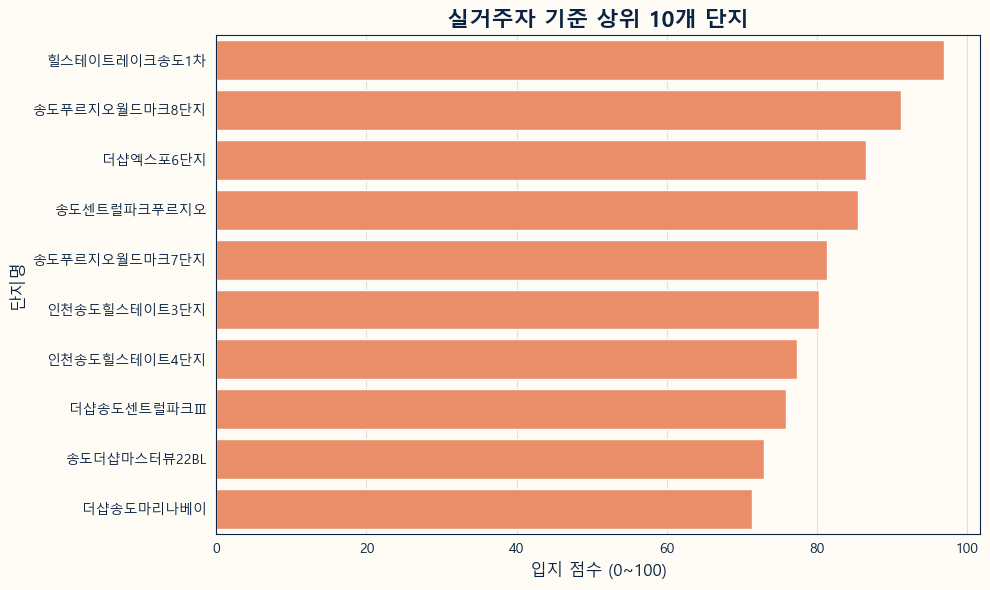

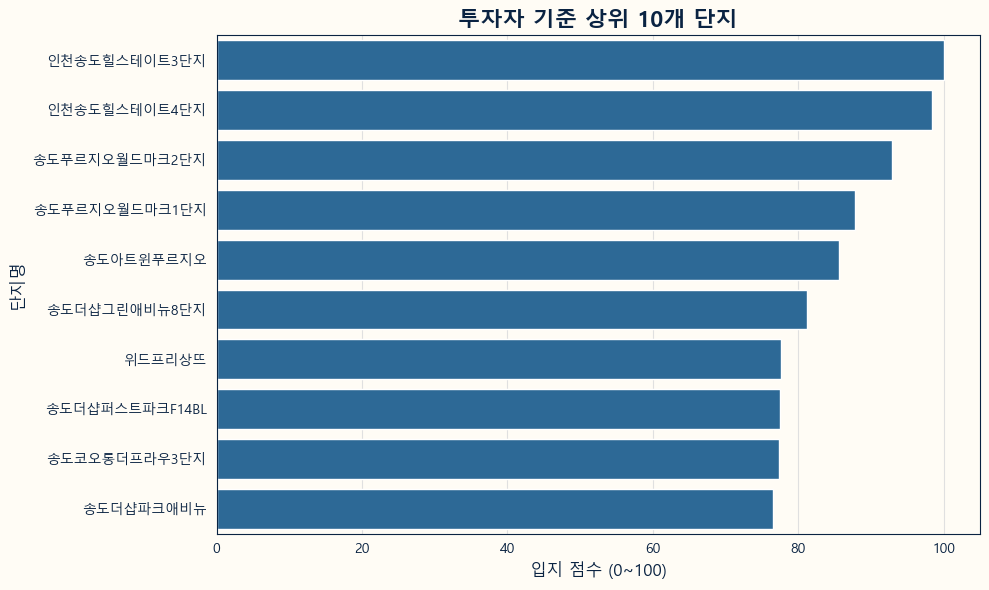

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

apply_navistyle()
# 실거주자 점수 계산
resident_weights = {
    'dist_to_nearest_station_m': 25,
    'dist_to_nearest_facility_m': 20,
    'excluUseAr': 20,
    'floor': 5,
    'brand_더샵': 15, 'brand_자이': 15, 'brand_푸르지오': 15, 'brand_힐스테이트': 15,
    'zone_1': 5, 'zone_2': 5, 'zone_5': 5, 'zone_6': 5, 'zone_8': 5,
    'nearby_conveniences': 10
}
resident_cols = list(resident_weights.keys())

# 투자자 점수 계산
investor_weights = {
    'pricePerpy': 20,
    'zone_6': 30, 'zone_8': 30,
    'HousingSupplyRate(%)': 15,
    'brand_푸르지오': 10, 'brand_힐스테이트': 10,
    'dist_to_nearest_station_m': 10,
    'Market Interest Rate': 10,
    'nearby_conveniences': 15,
    'nearby_transports': 15
}
investor_cols = list(investor_weights.keys())

# 정규화
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[resident_cols + investor_cols] = scaler.fit_transform(df_scaled[resident_cols + investor_cols])

# 점수 계산
df["resident_score"] = sum(df_scaled[col] * w for col, w in resident_weights.items())
df["investor_score"] = sum(df_scaled[col] * w for col, w in investor_weights.items())

# 0~100 정규화
df["resident_score_scaled"] = (df["resident_score"] - df["resident_score"].min()) / (df["resident_score"].max() - df["resident_score"].min()) * 100
df["investor_score_scaled"] = (df["investor_score"] - df["investor_score"].min()) / (df["investor_score"].max() - df["investor_score"].min()) * 100

# 상위 15개 단지 추출 (중복 제거)
top_resident = df.drop_duplicates("aptNm").sort_values("resident_score_scaled", ascending=False).head(10)
top_investor = df.drop_duplicates("aptNm").sort_values("investor_score_scaled", ascending=False).head(10)

# 스타일 적용
apply_navistyle()

# 시각화: 실거주자
plt.figure(figsize=(10, 6))
sns.barplot(data=top_resident, x="resident_score_scaled", y="aptNm", color=navipalette["sunset_orange"])
plt.title("실거주자 기준 상위 10개 단지")
plt.xlabel("입지 점수 (0~100)")
plt.ylabel("단지명")
plt.tight_layout()
plt.show()

# 시각화: 투자자
plt.figure(figsize=(10, 6))
sns.barplot(data=top_investor, x="investor_score_scaled", y="aptNm", color=navipalette["ocean_blue"])
plt.title("투자자 기준 상위 10개 단지")
plt.xlabel("입지 점수 (0~100)")
plt.ylabel("단지명")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 실거주자용 변수
resident_cols = [
    'dist_to_nearest_station_m', 'dist_to_nearest_facility_m', 'excluUseAr', 'floor',
    'brand_더샵', 'brand_자이', 'brand_푸르지오', 'brand_힐스테이트', 'zone_1', 'zone_2', 'zone_5',
    'zone_6', 'zone_8', 'nearby_conveniences'
]

# 실거주자 가중치 설정
resident_weights = {
    'dist_to_nearest_station_m': 25,
    'dist_to_nearest_facility_m': 20,
    'excluUseAr': 20,
    'floor': 5,
    'brand_더샵': 15,
    'brand_자이': 15,
    'brand_푸르지오': 15,
    'brand_힐스테이트': 15,
    'zone_1': 5,
    'zone_2': 5,
    'zone_5': 5,
    'zone_6': 5,
    'zone_8': 5,
    'nearby_conveniences': 10
}

# 데이터 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
df_resident_scaled = df[resident_cols].copy()
df_resident_scaled[resident_cols] = scaler.fit_transform(df_resident_scaled[resident_cols])

# 실거주자 점수 계산
df['resident_score'] = 0
for col, weight in resident_weights.items():
    df['resident_score'] += df_resident_scaled[col] * weight

# 최종 입지 점수 0~100 범위로 변환
df['resident_score_scaled'] = (df['resident_score'] - df['resident_score'].min()) / (df['resident_score'].max() - df['resident_score'].min()) * 100

# 결과 확인
df[['aptNm', 'resident_score', 'resident_score_scaled']].head()


,aptNm,resident_score,resident_score_scaled
0,송도풍림아이원1단지,15.895057,19.05604
1,송도풍림아이원1단지,15.895057,19.05604
2,송도풍림아이원1단지,15.895057,19.05604
3,송도풍림아이원1단지,15.895057,19.05604
4,송도풍림아이원1단지,15.895057,19.05604


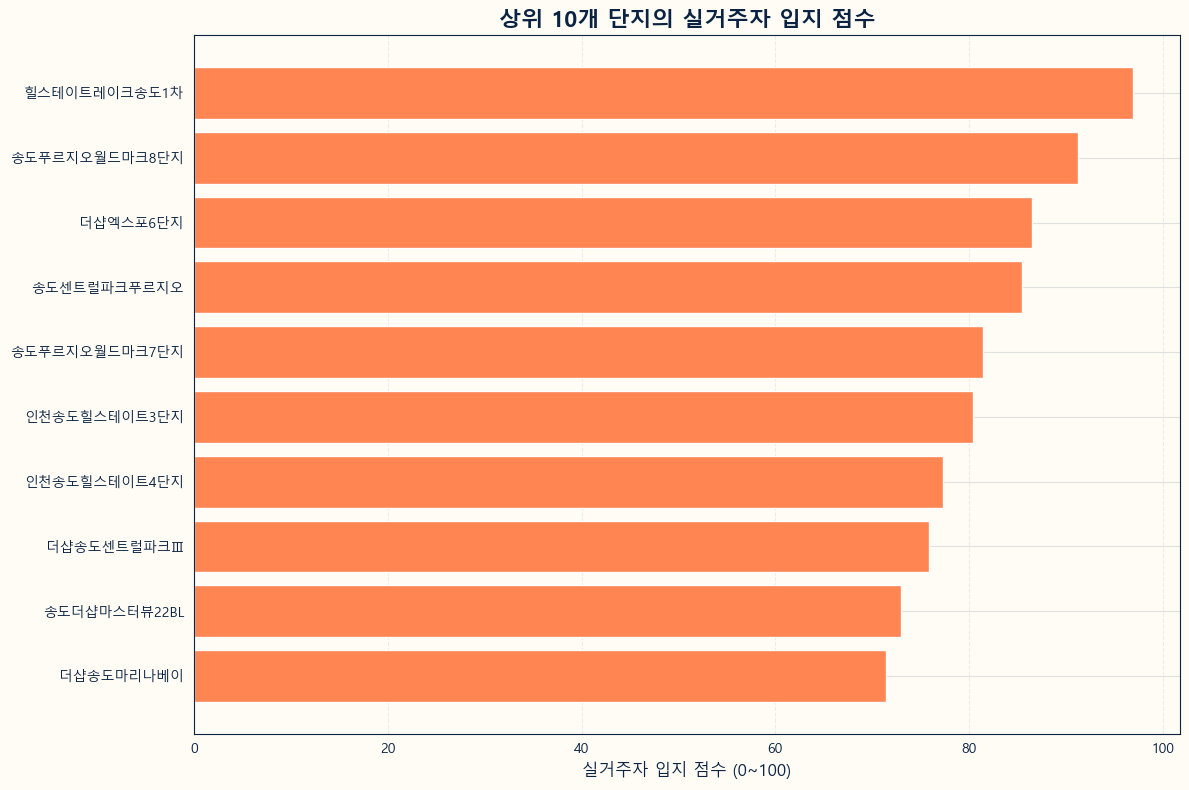

In [ ]:
# 상위 10개 단지 추출
top10_resident = df.drop_duplicates(subset='aptNm').sort_values("resident_score_scaled", ascending=False).head(10)

# 시각화
plt.figure(figsize=(12, 8))
plt.barh(top10_resident['aptNm'], top10_resident['resident_score_scaled'], color=navipalette['sunset_orange'])
plt.xlabel("실거주자 입지 점수 (0~100)", fontsize=12)
plt.title("상위 10개 단지의 실거주자 입지 점수", fontsize=16)
plt.gca().invert_yaxis()  # 높은 점수가 위로
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# 투자자용 변수
investor_cols = [
    'pricePerpy', 'zone_6', 'zone_8', 'HousingSupplyRate(%)', 'brand_푸르지오', 
    'brand_힐스테이트', 'dist_to_nearest_station_m', 'Market Interest Rate', 'nearby_conveniences', 'nearby_transports'
]

# 투자자용 변수에 정책 구역 반영
investor_weights = {
    'pricePerpy': 20,
    'zone_6': 30,  # 6공구에 대해 더 높은 가중치 부여
    'zone_8': 30,  # 8공구에 대해 더 높은 가중치 부여
    'HousingSupplyRate(%)': 15,
    'brand_푸르지오': 10,
    'brand_힐스테이트': 10,
    'dist_to_nearest_station_m': 10,
    'Market Interest Rate': 10,
    'nearby_conveniences': 15,
    'nearby_transports': 15
}

# 데이터 정규화 (Min-Max Scaling)
df_investor_scaled = df[investor_cols].copy()
df_investor_scaled[investor_cols] = scaler.fit_transform(df_investor_scaled[investor_cols])

# 투자자 점수 계산
df['investor_score'] = 0
for col, weight in investor_weights.items():
    df['investor_score'] += df_investor_scaled[col] * weight

# 최종 입지 점수 0~100 범위로 변환
df['investor_score_scaled'] = (df['investor_score'] - df['investor_score'].min()) / (df['investor_score'].max() - df['investor_score'].min()) * 100

# 결과 확인
df[['aptNm', 'investor_score', 'investor_score_scaled']].head()


,aptNm,investor_score,investor_score_scaled
0,송도풍림아이원1단지,56.80948,69.544326
1,송도풍림아이원1단지,56.80948,69.544326
2,송도풍림아이원1단지,56.80948,69.544326
3,송도풍림아이원1단지,56.80948,69.544326
4,송도풍림아이원1단지,56.80948,69.544326


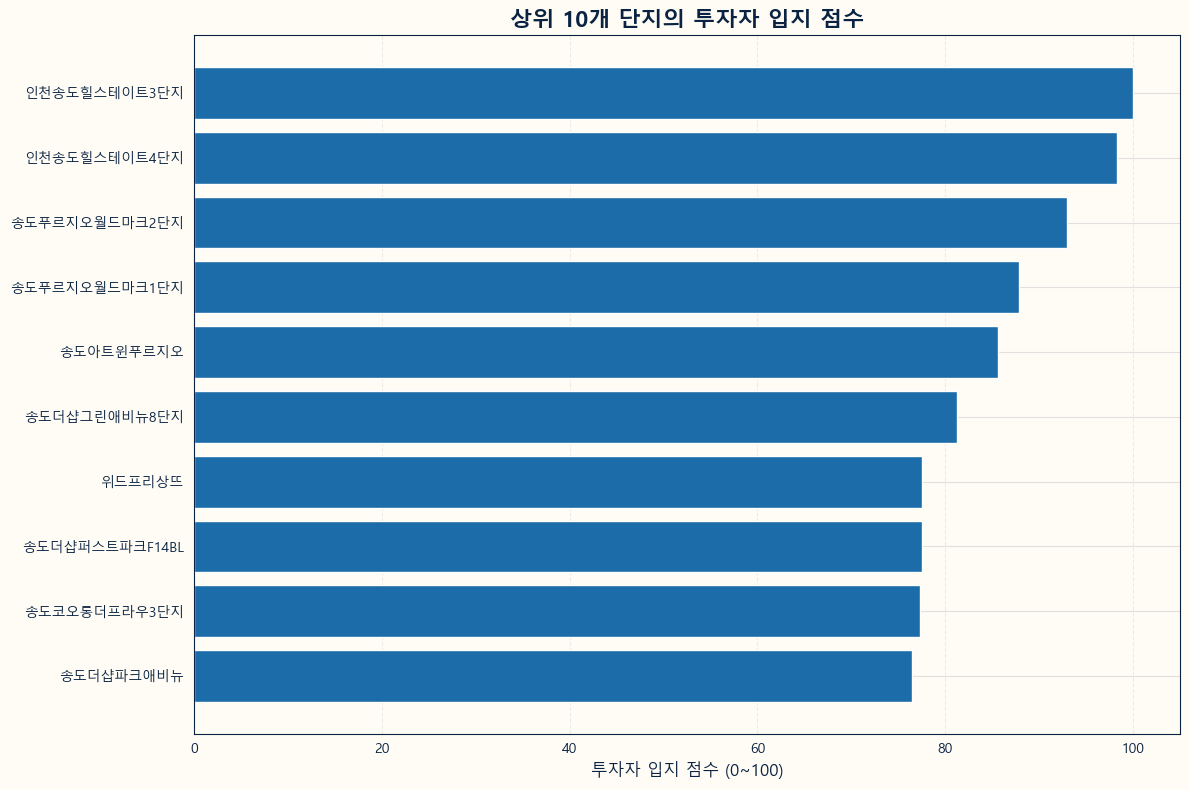

In [ ]:
# 상위 10개 단지 추출
top10_investor = df.drop_duplicates(subset='aptNm').sort_values("investor_score_scaled", ascending=False).head(10)

# 시각화
plt.figure(figsize=(12, 8))
plt.barh(top10_investor['aptNm'], top10_investor['investor_score_scaled'], color=navipalette['ocean_blue'])
plt.xlabel("투자자 입지 점수 (0~100)", fontsize=12)
plt.title("상위 10개 단지의 투자자 입지 점수", fontsize=16)
plt.gca().invert_yaxis()  # 높은 점수가 위로
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

정규화: MinMaxScaler를 사용하여 투자자와 관련된 변수들을 0~1 범위로 정규화합니다.

가중치 적용: 투자자용 변수들에 대해 미리 정의된 가중치를 곱해 점수를 계산합니다.

최종 점수 계산: 계산된 점수를 합산하고, 이를 0~100 범위로 변환합니다.

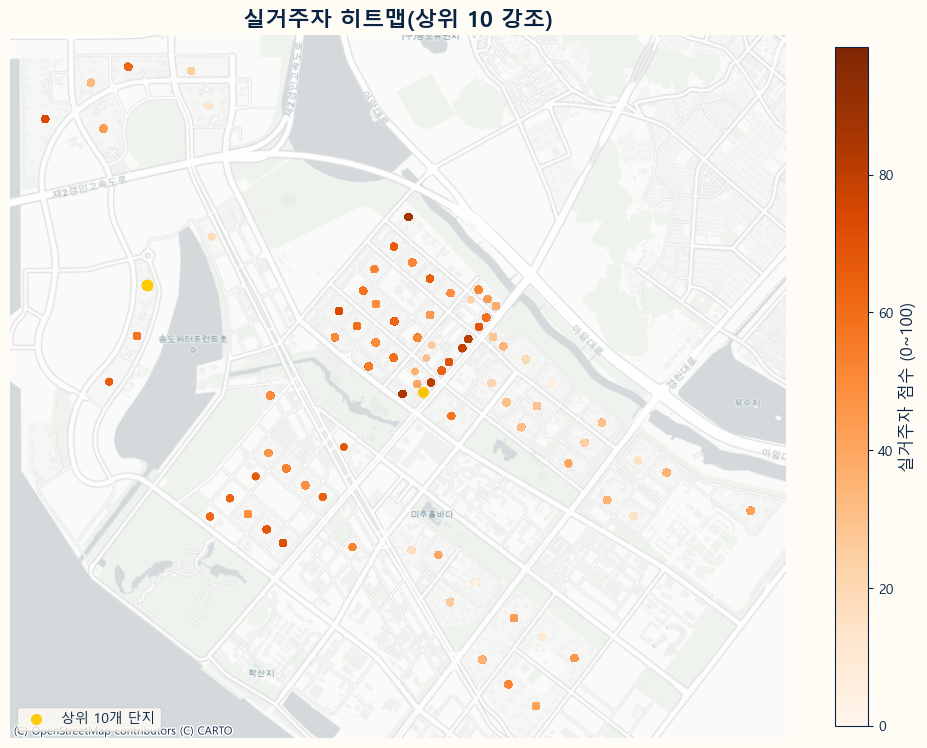

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# 색상 테마
navipalette = {
    "star_yellow": "#FFCB05",    # 상위 10개 강조
    "sail_white": "#FFFCF5",     # 지도 배경
    "deep_navy": "#0A2342"       # 텍스트용
}

# 데이터 불러오기 및 GeoDataFrame 변환
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
).to_crs(epsg=3857)

# 상위 10개 추출
top10 = gdf.sort_values('resident_score_scaled', ascending=False).head(10)
top10_ids = top10.index

# 시각화
fig, ax = plt.subplots(figsize=(10, 10))

# 일반 단지들: 파스텔 오렌지 컬러맵
gdf[~gdf.index.isin(top10_ids)].plot(
    ax=ax,
    column='resident_score_scaled',
    cmap="Oranges",  # 파스텔 주황 계열
    markersize=20,
    alpha=0.75,
    legend=True,
    legend_kwds={'label': "실거주자 점수 (0~100)", 'shrink': 0.7}
)

# 상위 10개 강조
gdf[gdf.index.isin(top10_ids)].plot(
    ax=ax,
    color=navipalette["star_yellow"],
    markersize=50,
    alpha=0.95,
    label="상위 10개 단지"
)

# 배경 지도 삽입
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# 스타일링
ax.set_facecolor(navipalette["sail_white"])
ax.set_title("실거주자 히트맵(상위 10 강조)", fontsize=16, fontweight='bold', color=navipalette["deep_navy"])
ax.axis('off')
plt.legend(loc='lower left')
plt.tight_layout()

# 저장 또는 출력
plt.savefig("실거주자_Heatmap_Oranges_파스텔톤.png", dpi=300)
plt.show()


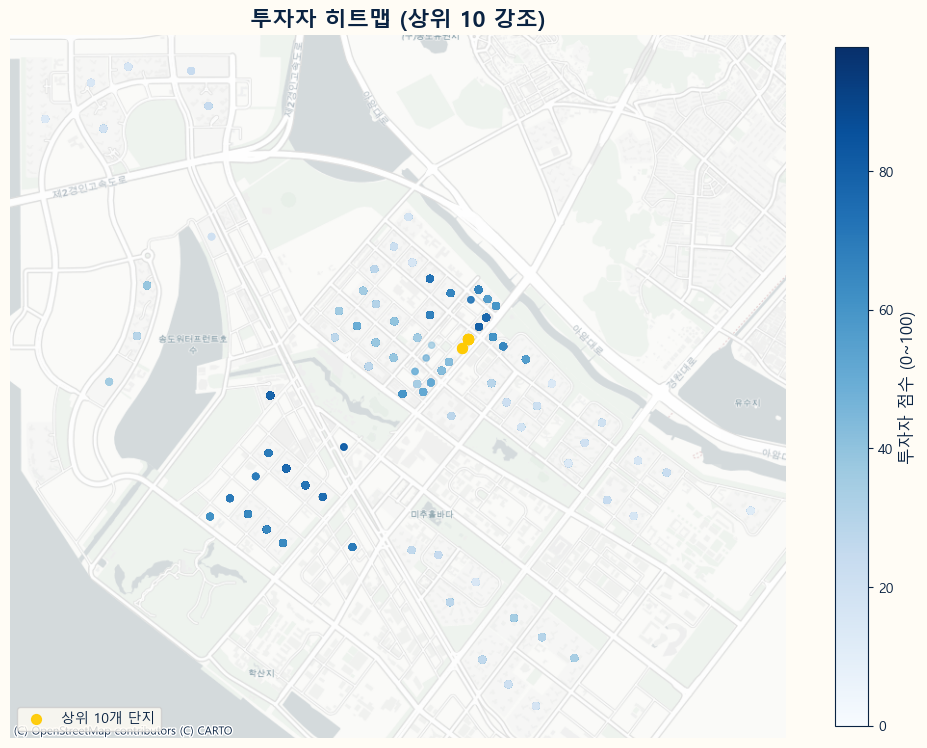

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# 항해사 색상 테마
navipalette = {
    "star_yellow": "#FFCB05",    # 상위 10개 강조
    "sail_white": "#FFFCF5",     # 지도 배경
    "deep_navy": "#0A2342"       # 텍스트용
}

# GeoDataFrame으로 변환 및 좌표계 설정
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
).to_crs(epsg=3857)  # 웹 맵용 좌표계

# 투자자 점수 기준 상위 10개 단지 추출
top10 = gdf.sort_values('investor_score_scaled', ascending=False).head(10)
top10_ids = top10.index

# 시각화
fig, ax = plt.subplots(figsize=(10, 10))

# 일반 단지: Blues 컬러맵
gdf[~gdf.index.isin(top10_ids)].plot(
    ax=ax,
    column='investor_score_scaled',
    cmap="Blues",
    markersize=20,
    alpha=0.75,
    legend=True,
    legend_kwds={'label': "투자자 점수 (0~100)", 'shrink': 0.7}
)

# 상위 10개 단지: 노란색 강조
gdf[gdf.index.isin(top10_ids)].plot(
    ax=ax,
    color=navipalette["star_yellow"],
    markersize=50,
    alpha=0.95,
    label="상위 10개 단지"
)

# 배경지도 추가
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# 스타일 적용
ax.set_facecolor(navipalette["sail_white"])
ax.set_title("투자자 히트맵 (상위 10 강조)",
             fontsize=16, fontweight='bold', color=navipalette["deep_navy"])
ax.axis('off')
plt.legend(loc='lower left')
plt.tight_layout()

# 저장
plt.savefig("투자자_Heatmap_Blues.png", dpi=300)
plt.show()


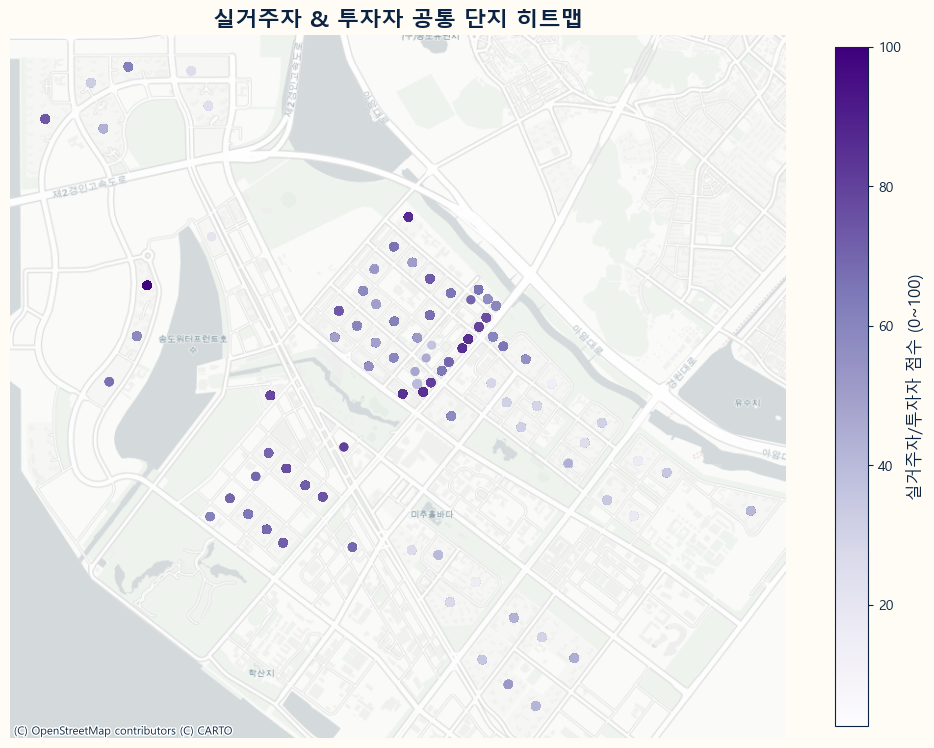

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# 색상 테마
navipalette = {
    "sail_white": "#FFFCF5",
    "deep_navy": "#0A2342"
}

df['aptNm'] = df['aptNm'].astype(str).str.strip()

# GeoDataFrame 생성
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
).to_crs(epsg=3857)

# 실거주자 / 투자자 각 상위 100개 단지 추출
top100_resident = df.sort_values('resident_score_scaled', ascending=False).drop_duplicates('aptNm').head(100)
top100_investor = df.sort_values('investor_score_scaled', ascending=False).drop_duplicates('aptNm').head(100)

# 겹치는 단지 판별
resident_set = set(top100_resident['aptNm'])
investor_set = set(top100_investor['aptNm'])
both_set = resident_set & investor_set

# 겹치는 단지만 필터링
both_df = gdf[gdf['aptNm'].isin(both_set)].copy()

# 점수 컬럼 (두 점수 중 더 높은 것 사용)
both_df['score'] = both_df[['resident_score_scaled', 'investor_score_scaled']].max(axis=1)

# 히트맵 시각화
fig, ax = plt.subplots(figsize=(10, 10))

both_df.plot(
    ax=ax,
    column='score',
    cmap='Purples',  # 통합 시각화를 위한 보라 계열
    markersize=30,
    alpha=0.9,
    legend=True,
    legend_kwds={'label': "실거주자/투자자 점수 (0~100)", 'shrink': 0.7}
)

# 배경 지도 삽입
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# 스타일 설정
ax.set_facecolor(navipalette["sail_white"])
ax.set_title("실거주자 & 투자자 공통 단지 히트맵", fontsize=16, fontweight='bold', color=navipalette["deep_navy"])
ax.axis('off')
plt.tight_layout()

# 저장
plt.savefig("통합_겹치는_단지_히트맵_Purples.png", dpi=300)
plt.show()


## 🗺️ 지도 시각화 설명

이 지도는 **실거주자와 투자자 점수 기준 상위 100개 단지**를 대상으로 시각화한 것입니다.  
각 단지는 **점수 유형에 따라 색상이 다르고**, **입지 점수가 높을수록 마커 크기도 커집니다.**

---

### 🎨 **마커 색상 의미**

| 색상 | 의미 | 설명 |
|------|------|------|
| 🟡 `#FFCB05` (노란색) | **공통 상위 단지** | 실거주자와 투자자 모두 상위 100위에 포함된 단지 |
| 🟠 `#FF8552` (주황색) | **실거주자 전용 단지** | 실거주자 점수는 상위 100위, 투자자 점수는 제외 |
| 🔵 `#1B6CA8` (파란색) | **투자자 전용 단지** | 투자자 점수는 상위 100위, 실거주자 점수는 제외 |

---

### 🔘 **마커 크기 의미**

- **마커의 크기는 해당 단지의 입지 점수를 반영**합니다.
- 실거주자 점수와 투자자 점수 중 **더 높은 점수**를 기준으로 크기를 결정합니다.

| 점수 범위 | 마커 크기 (픽셀 기준) | 의미 |
|-----------|------------------------|------|
| 20 이하 | 작음 (≈ 4~5px) | 상대적으로 낮은 입지 평가 |
| 40~60 | 중간 (≈ 8~12px) | 평균 수준의 입지 |
| 80 이상 | 큼 (≈ 16~20px) | 매우 우수한 입지 조건 |

> 👉 마커가 클수록 "누가 보더라도 입지적으로 유리한 단지"라는 뜻입니다.

---

### 💬 **마커 팝업 내용**

각 마커를 클릭하면 다음 정보를 확인할 수 있습니다:

- **단지명**
- **단지 유형** (공통/실거주자/투자자)
- **실거주자 점수 / 투자자 점수**
- **전용면적(㎡)**
- **역세권 거리(m)**

---

## 🧭 인사이트 예시 (블로그용)

> “노란색이면서 마커 크기가 큰 단지”는 실거주자와 투자자가 모두 높게 평가한 핵심 입지입니다.  
> 반면, 주황색·파란색 단지는 특정 페르소나의 선호가 더 강하게 작용한 사례로 해석할 수 있습니다.

---

필요하면 이 설명을 **티스토리 글 HTML 형식**으로도 변환해줄게!  
또는 지도 상단에 범례처럼 삽입할 수도 있어. 원할까? 😎

# **----------------------------------------------------------**

## 📊 통합 입지 점수 계산 방법

### ✅ 목적

실거주자와 투자자 관점은 서로 다른 기준을 가지고 있어 각기 다른 점수를 계산합니다.  
하지만 현실에서는 **“두 관점 모두를 만족시키는 입지”** 가 중요할 수 있습니다.  
따라서, 실거주자 점수와 투자자 점수를 **평균하여 통합 점수**로 활용합니다.

---

### 🧮 수식

> **통합 점수 = 실거주자 점수와 투자자 점수의 평균**

\[
\text{Combined Score} = \frac{\text{Resident Score}_{\text{scaled}} + \text{Investor Score}_{\text{scaled}}}{2}
\]

- `Resident Score_scaled`: 실거주자 페르소나 기준으로 정규화된 점수 (0~100)
- `Investor Score_scaled`: 투자자 페르소나 기준으로 정규화된 점수 (0~100)

---

### 📌 점수 산정의 흐름

1. **각 변수 정규화**  
   - Min-Max Scaling으로 0~1 범위로 변환
2. **가중치 적용**  
   - 실거주자: 공원 거리, 면적, 브랜드 등 중심  
   - 투자자: 저평가 여부, 정책 구역, 전세가율 등 중심
3. **가중합 → 스케일링 (0~100)**  
4. **두 점수 평균 → Combined Score 생성**

---

### 🎯 통합 점수의 해석

| 통합 점수 | 해석 |
|------------|------|
| 90~100 | 실거주자와 투자자 모두에게 매우 우수한 입지 |
| 60~80 | 중간 이상 입지, 한 쪽에서 특히 강점이 있음 |
| 40 이하 | 한쪽 또는 양쪽 모두 낮은 평가를 받은 입지 |

---

> 실거주자와 투자자의 관점을 모두 반영한 **통합 입지 점수**는,  
> 단지의 현재 가치와 미래 가치 사이의 균형을 수치화한 지표입니다.  
> **공통 선호도가 높은 단지일수록 통합 점수가 높게 나타납니다.**


# **---------------------------------------------------**

# 인사이트
실거주자와 투자자 점수를 합친 시각화에서 도출할 수 있는 **인사이트**는 다양한 측면에서 접근할 수 있습니다. 이 인사이트들은 도시 개발, 부동산 투자 및 거주지 선택에 있어 중요한 정보를 제공합니다. 여기에는 실거주자와 투자자 각각의 요구와 선호를 고려한 분석이 포함됩니다.

### **1. 실거주자와 투자자 선호 지역의 겹치는 부분**
- 두 점수가 모두 높은 지역은 **실거주자**와 **투자자**가 **공통으로 선호하는 지역**입니다. 
- 이런 지역은 **생활 편의성**과 **미래 가치**가 모두 높은 곳일 가능성이 큽니다. 예를 들어, 교통이 편리하고, 공원, 상업시설 등 생활 인프라가 잘 갖춰져 있으며, 동시에 **투자 잠재력**이 높은 지역이 될 것입니다.
- **의미**: 실거주자와 투자자가 모두 선호하는 지역은 **단기적인 생활의 질**과 **장기적인 자산 가치를 모두 고려할 수 있는 최적의 위치**를 의미합니다.

### **2. 실거주자 선호 지역**
- 이 지역들은 **실거주자**의 입장에서 **교통 접근성**, **생활 인프라**, **전용면적** 등을 고려하여 선호되는 지역입니다. 
- 실거주자가 선호하는 지역은 **거주 환경이 좋고** **가족 단위 거주**에 적합한 지역으로, **주거 환경**이 가장 중요한 요소일 것입니다.
- **의미**: 실거주자가 선호하는 지역은 **생활의 질**을 최우선으로 고려한 지역입니다. 이러한 지역은 **편리한 교통**, **인프라**가 잘 갖추어져 있고 **가족들이 선호하는** 주거지일 가능성이 높습니다.

### **3. 투자자 선호 지역**
- 투자자들은 **미래 가치를 중시**하며, **저평가된 지역**에 투자하려는 경향이 있습니다. 예를 들어, **저평가된 평당가**를 가진 지역이나 **향후 개발될 가능성**이 있는 지역이 투자자의 선호 지역에 포함될 것입니다.
- **의미**: 투자자는 **단기적 수익**보다는 **장기적인 자산 가치를 중시**합니다. 따라서 **개발이 예상되는 지역**, **시장이 성장할 가능성이 있는 지역**에 관심을 가질 수 있습니다.

### **4. 교차 분석 (실거주자와 투자자 간의 상호작용)**
- 실거주자와 투자자가 **공통적으로 선호하는 지역**은 두 관점 모두에서 **높은 가치**를 지닌 곳으로, 특히 **장기적인 가치 상승**이 기대되는 지역입니다. 이런 지역은 **주거와 투자** 양쪽 모두에서 중요한 의미를 가집니다.
- **투자자만 선호하는 지역**:
 - 투자자만 선호하는 지역은 **미래 개발 가능성**이나 **현재 저평가된 가격**이 반영된 곳일 수 있습니다. 실거주자에게는 아직 선호되지 않지만, 시간이 지나면서 개발과 인프라 확장이 이루어지면 실거주자들에게도 매력적인 장소가 될 수 있습니다.
- **실거주자만 선호하는 지역**:
 - 실거주자가 선호하는 지역은 **현재의 생활 환경**이 좋은 곳입니다. 이 지역은 **단기적인 생활의 질**을 중요시하는 사람들에게는 최고의 선택이 될 수 있지만, **장기적인 수익**을 추구하는 투자자에게는 상대적으로 덜 매력적일 수 있습니다.

### **5. 시각화 결과에서의 중요 결론**
   - **생활 환경과 투자 잠재력의 균형**을 맞추는 것이 중요합니다. 실거주자와 투자자가 모두 선호하는 지역은 **주거지로서의 가치와 미래 자산 가치**가 동시에 높기 때문에, 이러한 지역에 대한 관심이 특히 중요합니다.
   - **단기적인 거주지 선택**을 고려하는 사람들에게는 **실거주자 선호 지역**이, **장기적인 투자**를 고려하는 사람들에게는 **투자자 선호 지역**이 더 중요할 수 있습니다.

---

### **실거주자와 투자자의 점수 시각화에서 얻을 수 있는 전략적 인사이트:**
1. **주거지 선택**: 실거주자와 투자자가 모두 선호하는 지역은 **가족 단위 주거지**로 적합하며, 주거 환경과 미래 가치가 동시에 고려된 지역입니다.
2. **투자 기회**: 투자자만 선호하는 지역은 **저평가된 지역**일 가능성이 높고, 미래 가치 상승이 예상되는 곳으로 **장기 투자**에 유리할 수 있습니다.
3. **단기적 가치**: 실거주자만 선호하는 지역은 **현재 생활 환경**이 좋은 곳으로 **단기적으로 안정된 주거지**가 될 수 있습니다.

이러한 분석을 바탕으로 **부동산 개발** 또는 **투자** 결정을 내릴 때 유용한 인사이트를 도출할 수 있습니다.

In [ ]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

apply_navistyle()
# 지도 중심 위치 (송도 중심)
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13, tiles='cartodbpositron')

# 마커 클러스터 추가
marker_cluster = MarkerCluster().add_to(m)

# 시각화 반복
for _, row in df.iterrows():
    popup = folium.Popup(f"""
        <div style="font-family: 'Malgun Gothic'; font-size: 13px;">
        <b>📍 단지명:</b> {row['aptNm']}<br>
        <b>💰 입지 점수:</b> {row['loc_score_scaled']:.1f}<br>
        <b>🏷️ 실거래가:</b> {int(np.exp(row['log_dealAmount'])):,} 원<br>
        <b>📏 전용면적:</b> {row['excluUseAr']}㎡<br>
        <b>🚇 역까지 거리:</b> {int(row['dist_to_nearest_station_m'])}m
        </div>
    """, max_width=300)

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color=navipalette["ocean_blue"],
        fill=True,
        fill_color=navipalette["sunset_orange"],
        fill_opacity=0.85,
        weight=2,
        popup=popup
    ).add_to(marker_cluster)

# 저장
m.save("입지점수_전체 지도.html")


In [ ]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

# 항해사 테마 컬러 팔레트
navipalette = {
    "deep_navy": "#0A2342",
    "ocean_blue": "#1B6CA8",
    "sand_beige": "#D9CBA3",
    "sunset_orange": "#FF8552",
    "star_yellow": "#FFCB05",
    "sail_white": "#FFFCF5"
}

# 지도 중심 위치 (송도 중심)
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13, tiles='cartodbpositron')

# 상위 30개 단지 추출
top30 = df.sort_values('loc_score_scaled', ascending=False).head(30)

# 마커 클러스터 추가
marker_cluster = MarkerCluster().add_to(m)

# 시각화 반복
for _, row in top30.iterrows():
    popup = folium.Popup(f"""
        <div style="font-family: 'Malgun Gothic'; font-size: 13px;">
        <b>📍 단지명:</b> {row['aptNm']}<br>
        <b>💰 입지 점수:</b> {row['loc_score_scaled']:.1f}<br>
        <b>🏷️ 실거래가:</b> {int(np.exp(row['log_dealAmount'])):,} 원<br>
        <b>📏 전용면적:</b> {row['excluUseAr']}㎡<br>
        <b>🚇 역까지 거리:</b> {int(row['dist_to_nearest_station_m'])}m
        </div>
    """, max_width=300)

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color=navipalette["ocean_blue"],
        fill=True,
        fill_color=navipalette["sunset_orange"],
        fill_opacity=0.85,
        weight=2,
        popup=popup
    ).add_to(marker_cluster)

# 저장
m.save("입지점수_전체상위30.html")


In [ ]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

# 항해사 색상 테마
navipalette = {
    "sunset_orange": "#FF8552",  # 실거주자용 색
}

# 지도 중심
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13, tiles='cartodbpositron')

# 상위 100개 단지만 추출
top100 = df.sort_values('resident_score_scaled', ascending=False).head(100)

# 마커 클러스터 생성
marker_cluster = MarkerCluster().add_to(m)

# 마커 시각화
for _, row in top100.iterrows():
    # 간결한 팝업 텍스트
    popup = folium.Popup(f"""
        <div style="font-family: 'Malgun Gothic'; font-size: 13px;">
        📍 <b>{row['aptNm']}</b><br>
        💰 점수: {row['resident_score_scaled']:.1f}<br>
        📏 면적: {row['excluUseAr']}㎡ / 🚇 거리: {int(row['dist_to_nearest_station_m'])}m
        </div>
    """, max_width=250)

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color=navipalette["sunset_orange"],
        fill=True,
        fill_color=navipalette["sunset_orange"],
        fill_opacity=0.85,
        weight=2,
        popup=popup
    ).add_to(marker_cluster)

# 저장
m.save("실거주자_상위100_입지점수_지도_최적화.html")


In [ ]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

# 투자자용 색상 팔레트
navipalette = {
    "ocean_blue": "#1B6CA8",  # 투자자 선호 지역
}

# 투자자 점수 시각화 지도
m_investor = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=13, tiles='cartodbpositron')
marker_cluster_investor = MarkerCluster().add_to(m_investor)

# 투자자 점수 시각화
for _, row in df.iterrows():
    popup = folium.Popup(f"""
        <div style="font-family: 'Malgun Gothic'; font-size: 13px;">
        <b>📍 단지명:</b> {row['aptNm']}<br>
        <b>💰 투자자 입지 점수:</b> {row['investor_score_scaled']:.1f}<br>
        <b>🏷️ 실거래가:</b> {int(np.exp(row['log_dealAmount'])):,} 원<br>
        <b>📏 전용면적:</b> {row['excluUseAr']}㎡<br>
        <b>🚇 역까지 거리:</b> {int(row['dist_to_nearest_station_m'])}m
        </div>
    """, max_width=300)

    # 투자자 점수에 따른 색상 및 크기 설정
    color = navipalette["ocean_blue"]
    marker_size = row['investor_score_scaled'] / 2

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=marker_size,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.85,
        weight=2,
        popup=popup
    ).add_to(marker_cluster_investor)

# 투자자 점수 지도 저장
m_investor.save("투자자_입지점수_항해사 스타일 지도.html")


In [ ]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

# 색상 테마
navipalette = {
    "sunset_orange": "#FF8552",  # 실거주자 단독
    "ocean_blue": "#1B6CA8",     # 투자자 단독
    "star_yellow": "#FFCB05",    # 겹치는 단지
}

# 지도 설정
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13, tiles='cartodbpositron')
marker_cluster = MarkerCluster().add_to(m)

# 상위 100개씩 추출
top100_resident = df.sort_values('resident_score_scaled', ascending=False).head(100)
top100_investor = df.sort_values('investor_score_scaled', ascending=False).head(100)

# 겹치는 단지명 추출
resident_set = set(top100_resident['aptNm'])
investor_set = set(top100_investor['aptNm'])

overlap_set = resident_set & investor_set
resident_only_set = resident_set - overlap_set
investor_only_set = investor_set - overlap_set

# 하나의 DataFrame으로 병합 (중복 제거)
combined_df = pd.concat([top100_resident, top100_investor]).drop_duplicates(subset='aptNm')

# 시각화
for _, row in combined_df.iterrows():
    apt = row['aptNm']
    
    if apt in overlap_set:
        color = navipalette["star_yellow"]
    elif apt in resident_only_set:
        color = navipalette["sunset_orange"]
    elif apt in investor_only_set:
        color = navipalette["ocean_blue"]
    else:
        continue

    # 마커 크기: 실거주자와 투자자 점수 중 더 큰 값 기준
    max_score = max(row['resident_score_scaled'], row['investor_score_scaled'])
    marker_size = max_score / 5  # 범위 0~100 → 0~20

    popup = folium.Popup(f"""
        <div style="font-family: 'Malgun Gothic'; font-size: 13px;">
        📍 <b>{apt}</b><br>
        💡 유형: {"공통 선호" if apt in overlap_set else "실거주자" if apt in resident_only_set else "투자자"}<br>
        💰 실거주자: {row['resident_score_scaled']:.1f}, 투자자: {row['investor_score_scaled']:.1f}<br>
        📏 {row['excluUseAr']}㎡ / 🚇 {int(row['dist_to_nearest_station_m'])}m
        </div>
    """, max_width=280)

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=marker_size,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.85,
        weight=2,
        popup=popup
    ).add_to(marker_cluster)

# 저장
m.save("실거주자_투자자_100위_통합_점수기반_마커크기.html")
